In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [6]:
cnn = Sequential()

In [7]:
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))


In [8]:
cnn.add(MaxPooling2D())

In [9]:
cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [10]:
history_cnn = cnn.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0963 - accuracy: 0.9700 - val_loss: 0.0363 - val_accuracy: 0.9886
Epoch 2/5
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0268 - val_accuracy: 0.9914
Epoch 3/5
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0134 - val_accuracy: 0.9958
Epoch 4/5
60000/60000 [==============================] - 252s 4ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0134 - val_accuracy: 0.9958
Epoch 5/5
60000/60000 [==============================] - 258s 4ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0074 - val_accuracy: 0.9977


Text(0.5, 0, 'Epochs')

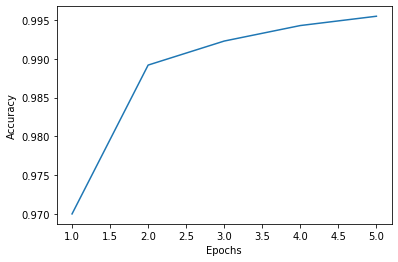

In [15]:

loss=[0.0963,0.0352,0.0250,0.0177,0.0148]
acc=[0.9700,0.9892,0.9923,0.9943,0.9955]
epochs=[1,2,3,4,5]
plt.plot(epochs,acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
#plt.plot(history_cnn.history['loss'])
#plt.plot(history_cnn.history['acc'])

Text(0.5, 0, 'Epochs')

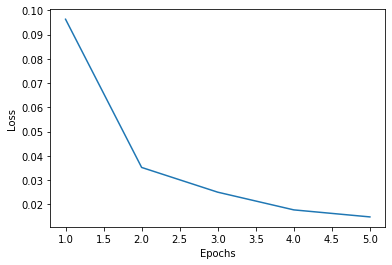

In [16]:
plt.plot(epochs,loss)
plt.ylabel('Loss')
plt.xlabel('Epochs')